In [ ]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Generate date range (last 30 days)
end_date = datetime.today()
start_date = end_date - timedelta(days=29)
dates = pd.date_range(start=start_date, end=end_date)

# Function to generate realistic values
def random_mood():
    return random.randint(4, 10)  # range 4–10

def random_productivity():
    return round(random.uniform(1, 6), 1)  # hours per day

def random_sleep():
    return round(random.uniform(5, 9), 1)

def random_steps():
    return random.randint(3000, 12000)

# Create dataframe
mood_df = pd.DataFrame({
    'date': dates,
    'mood': [random_mood() for _ in dates],
    'productivity_hours': [random_productivity() for _ in dates],
    'sleep_hours': [random_sleep() for _ in dates],
    'steps': [random_steps() for _ in dates],
})

mood_df['date'] = mood_df['date'].dt.strftime("%Y-%m-%d")

mood_df.head(), mood_df.tail()


(         date  mood  productivity_hours  sleep_hours  steps
 0  2025-11-09     9                 1.6          7.5   3957
 1  2025-11-10     4                 1.6          7.8   5153
 2  2025-11-11     4                 5.5          7.7   7838
 3  2025-11-12     9                 1.7          8.9  11599
 4  2025-11-13     8                 2.4          5.4   5864,
           date  mood  productivity_hours  sleep_hours  steps
 25  2025-12-04     6                 4.2          8.6  10987
 26  2025-12-05     9                 4.0          6.3   4082
 27  2025-12-06     7                 4.4          5.3   7342
 28  2025-12-07     7                 5.4          5.5   6218
 29  2025-12-08     7                 4.3          7.6   3730)

In [ ]:
import requests
import pandas as pd

# API link for London weather (30 days)
url = "https://api.open-meteo.com/v1/forecast"

params = {
    "latitude": 51.5072,
    "longitude": -0.1276,
    "daily": "temperature_2m_max,temperature_2m_min,precipitation_sum,cloudcover_mean,wind_speed_10m_max,uv_index_max",
    "timezone": "Europe/London",
    "past_days": 30
}

response = requests.get(url, params=params)
data = response.json()

weather_df = pd.DataFrame({
    "date": data["daily"]["time"],
    "temp_max": data["daily"]["temperature_2m_max"],
    "temp_min": data["daily"]["temperature_2m_min"],
    "rainfall": data["daily"]["precipitation_sum"],
    "cloud_cover": data["daily"]["cloudcover_mean"],
    "wind_speed": data["daily"]["wind_speed_10m_max"],
    "uv_index": data["daily"]["uv_index_max"]
})

weather_df.head(), weather_df.tail()


(         date  temp_max  temp_min  rainfall  cloud_cover  wind_speed  uv_index
 0  2025-11-08      14.7       9.7       0.8           70        11.2      1.20
 1  2025-11-09      13.9       8.0       0.1           74        13.3      1.75
 2  2025-11-10      13.8      10.5      13.6           92        14.8      0.70
 3  2025-11-11      15.7       9.5       0.1           82        18.6      1.35
 4  2025-11-12      16.5      13.6       0.5           87        16.8      1.25,
           date  temp_max  temp_min  rainfall  cloud_cover  wind_speed  \
 32  2025-12-10      12.8       7.6      0.00           75        18.2   
 33  2025-12-11      10.9       6.1      0.00           58        10.4   
 34  2025-12-12      12.0       5.6      2.02           99        14.5   
 35  2025-12-13      11.6       5.4      0.30           59        18.5   
 36  2025-12-14      11.4       9.8      1.80           99        20.9   
 
     uv_index  
 32      1.05  
 33      0.95  
 34      0.85  
 35      

In [ ]:
# Merge both datasets on "date"
merged_df = mood_df.merge(weather_df, on="date")

merged_df.head(), merged_df.tail()


(         date  mood  productivity_hours  sleep_hours  steps  temp_max  \
 0  2025-11-09     9                 1.6          7.5   3957      13.9   
 1  2025-11-10     4                 1.6          7.8   5153      13.8   
 2  2025-11-11     4                 5.5          7.7   7838      15.7   
 3  2025-11-12     9                 1.7          8.9  11599      16.5   
 4  2025-11-13     8                 2.4          5.4   5864      16.9   
 
    temp_min  rainfall  cloud_cover  wind_speed  uv_index  
 0       8.0       0.1           74        13.3      1.75  
 1      10.5      13.6           92        14.8      0.70  
 2       9.5       0.1           82        18.6      1.35  
 3      13.6       0.5           87        16.8      1.25  
 4      13.4       3.7           75        12.1      1.60  ,
           date  mood  productivity_hours  sleep_hours  steps  temp_max  \
 25  2025-12-04     6                 4.2          8.6  10987       9.2   
 26  2025-12-05     9                 4.0  

In [ ]:
merged_df.to_csv("pearlyn_weather_mood_dataset.csv", index=False)
mood_df.to_csv("pearlyn_mood_dataset.csv", index=False)
weather_df.to_csv("london_weather_dataset.csv", index=False)

"Files saved successfully!"


'Files saved successfully!'

In [ ]:
import pandas as pd

df = pd.read_csv("pearlyn_weather_mood_dataset.csv")
df.head()


,date,mood,productivity_hours,sleep_hours,steps,temp_max,temp_min,rainfall,cloud_cover,wind_speed,uv_index
0,2025-11-09,9,1.6,7.5,3957,13.9,8.0,0.1,74,13.3,1.75
1,2025-11-10,4,1.6,7.8,5153,13.8,10.5,13.6,92,14.8,0.70
2,2025-11-11,4,5.5,7.7,7838,15.7,9.5,0.1,82,18.6,1.35
3,2025-11-12,9,1.7,8.9,11599,16.5,13.6,0.5,87,16.8,1.25
4,2025-11-13,8,2.4,5.4,5864,16.9,13.4,3.7,75,12.1,1.60


from matplotlib import pyplot as plt
_df_0['mood'].plot(kind='hist', bins=20, title='mood')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['productivity_hours'].plot(kind='hist', bins=20, title='productivity_hours')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['sleep_hours'].plot(kind='hist', bins=20, title='sleep_hours')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['steps'].plot(kind='hist', bins=20, title='steps')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='mood', y='productivity_hours', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='productivity_hours', y='sleep_hours', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='sleep_hours', y='steps', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='steps', y='temp_max', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['mood']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('date')):
  _plot_series(series, series_name, i)
  fig.legend(title='date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('mood')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['productivity_hours']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('date')):
  _plot_series(series, series_name, i)
  fig.legend(title='date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('productivity_hours')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['sleep_hours']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('date')):
  _plot_series(series, series_name, i)
  fig.legend(title='date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('sleep_hours')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['steps']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('date')):
  _plot_series(series, series_name, i)
  fig.legend(title='date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('steps')

from matplotlib import pyplot as plt
_df_13['mood'].plot(kind='line', figsize=(8, 4), title='mood')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['productivity_hours'].plot(kind='line', figsize=(8, 4), title='productivity_hours')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['sleep_hours'].plot(kind='line', figsize=(8, 4), title='sleep_hours')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['steps'].plot(kind='line', figsize=(8, 4), title='steps')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='mood', y='date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='productivity_hours', y='date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='sleep_hours', y='date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='steps', y='date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                30 non-null     object 
 1   mood                30 non-null     int64  
 2   productivity_hours  30 non-null     float64
 3   sleep_hours         30 non-null     float64
 4   steps               30 non-null     int64  
 5   temp_max            30 non-null     float64
 6   temp_min            30 non-null     float64
 7   rainfall            30 non-null     float64
 8   cloud_cover         30 non-null     int64  
 9   wind_speed          30 non-null     float64
 10  uv_index            30 non-null     float64
dtypes: float64(7), int64(3), object(1)
memory usage: 2.7+ KB


,mood,productivity_hours,sleep_hours,steps,temp_max,temp_min,rainfall,cloud_cover,wind_speed,uv_index
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,6.433333,3.386667,7.036667,6713.200000,11.193333,6.690000,3.213333,76.933333,17.106667,1.063333
std,1.735697,1.401903,1.278330,2523.777675,3.383014,3.971741,4.545231,23.589789,4.474598,0.472326
min,4.000000,1.300000,5.100000,3091.000000,4.200000,-0.100000,0.000000,20.000000,10.200000,0.100000
25%,5.000000,2.225000,5.775000,5078.750000,8.425000,3.900000,0.100000,67.250000,14.050000,0.800000
50%,6.500000,3.550000,7.400000,6289.000000,11.100000,6.800000,1.150000,84.500000,16.800000,1.225000
75%,8.000000,4.300000,8.025000,7946.000000,13.900000,9.450000,4.275000,94.750000,19.525000,1.387500
max,9.000000,5.900000,9.000000,11928.000000,16.900000,13.600000,17.900000,100.000000,27.900000,1.750000


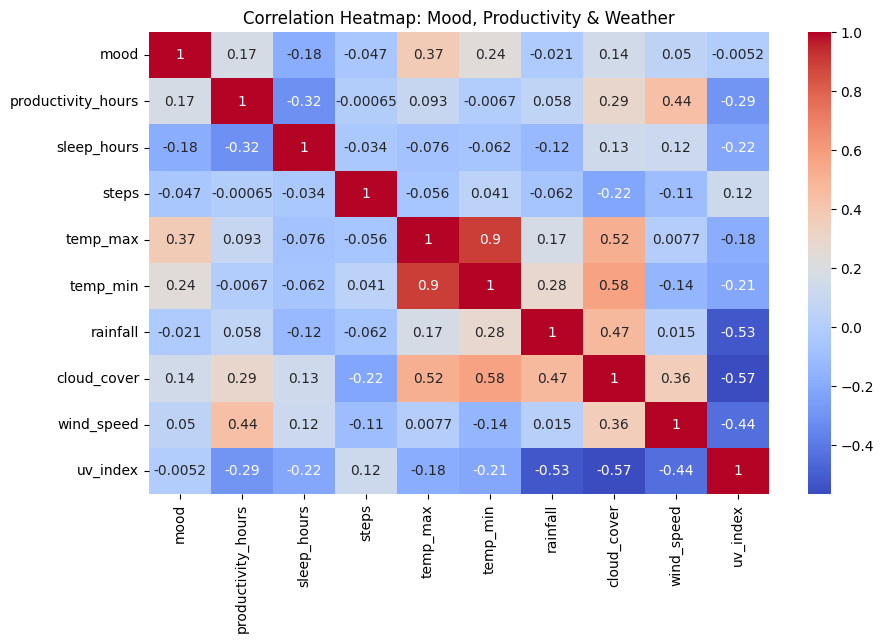

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remove non-numeric columns (like date)
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap: Mood, Productivity & Weather")
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving pearlyn_weather_mood_dataset.csv to pearlyn_weather_mood_dataset.csv
Saving pearlyn_mood_dataset.csv to pearlyn_mood_dataset.csv
Saving london_weather_dataset.csv to london_weather_dataset.csv


In [ ]:
import pandas as pd

df = pd.read_csv("pearlyn_weather_mood_dataset.csv")
df.head()


,date,mood,productivity_hours,sleep_hours,steps,temp_max,temp_min,rainfall,cloud_cover,wind_speed,uv_index
0,2025-11-09,9,1.6,7.5,3957,13.9,8.0,0.1,74,13.3,1.75
1,2025-11-10,4,1.6,7.8,5153,13.8,10.5,13.6,92,14.8,0.70
2,2025-11-11,4,5.5,7.7,7838,15.7,9.5,0.1,82,18.6,1.35
3,2025-11-12,9,1.7,8.9,11599,16.5,13.6,0.5,87,16.8,1.25
4,2025-11-13,8,2.4,5.4,5864,16.9,13.4,3.7,75,12.1,1.60


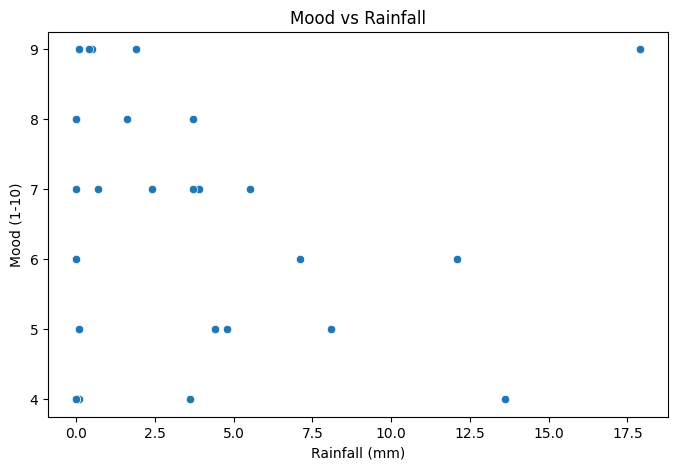

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(x=df["rainfall"], y=df["mood"])
plt.title("Mood vs Rainfall")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Mood (1-10)")
plt.show()


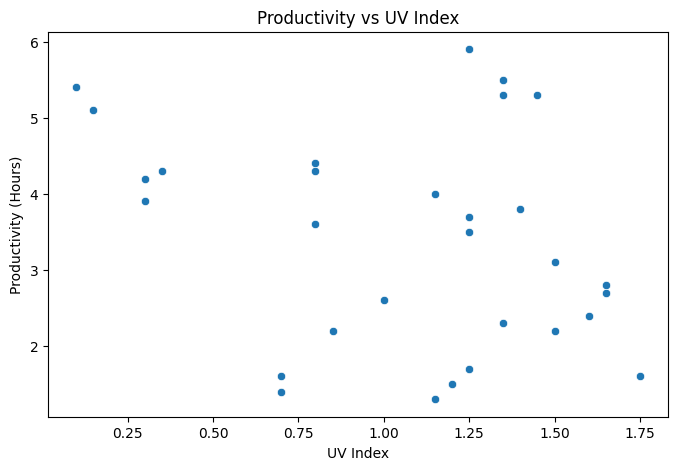

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["uv_index"], y=df["productivity_hours"])
plt.title("Productivity vs UV Index")
plt.xlabel("UV Index")
plt.ylabel("Productivity (Hours)")
plt.show()


In [ ]:
df["rainy_day"] = df["rainfall"] > 0
df.groupby("rainy_day")[["mood", "productivity_hours"]].mean()


,mood,productivity_hours
rainy_day,,
False,6.142857,2.957143
True,6.521739,3.517391
